# <a id='toc1_'></a>[**Detección de Patrones (Python)**](#toc0_)

# **Contenido**<a id='toc0_'></a>
- [**Detección de Patrones (Python)**](#toc1_)    
  - [Introducción](#toc1_1_)    
  - [Visualizar los datos](#toc1_2_)    
  - [Preprocesamiento y preparación de los datos](#toc1_3_)    
  - [Enriquecer los datos](#toc1_4_)    
  - [Análisis de los datos](#toc1_5_)    
  - [Hipótesis:](#toc1_6_)    
  - [Conclusiones](#toc1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introducción](#toc0_)

- **Solicitud de la empresa ICE:**
    - Cuales son los posibles patrones para que un videojuego tenga éxito.

La tienda online ICE, vende videojuegos por todo el mundo y solicita identificar los patrones para que un juego logre tener éxito en el mercado. Esto con el objetivo de detectar proyectos prometedores y planificar campañas publicitarias para el proximo año.

- **Plan de trabajo:**
    1. **Visualizar los datos:** tener el primer contactó con los datos y priorizar la visualización en las necesidades para el preprocesamiento.
    1. **Preprocesamiento y preparación de datos:** Según los resultados obtenidos en la visualización de datos, se corregirán los siguientes puntos:
        - Tipos de datos.
        - Datos ausentes.
        - Encabezados en mayúscula.
        
    Con los resultados encontrados en el preprocesamiento, se toman decisiones de como solucionar los datos de tipos errados, los valores ausentes(revisar si pueden ser rellenados, se amputaran en caso de no superar el 5% de la población, o se dejaran si representan más del 5% de la población y no pueden ser rellenados por la media o mediana de otra variable con gran relación).
    
    3. **Enriquecimiento de los datos:** Ya con el preprocesamiento aplicado y ya con mayor conocimiento del datasets en estudio, optimizar la información agregando valores por extracción del mismo datasets para lograr un mejor análisis.

    4. **Análisis de los datos:** Utilizar todas las herramientas, tecnologías y procesos para encontrar tendencias y lograr una propuesta con gran robustez numérica.
    5. **Probar hipótesis:** Ya con el análisis realizado y con los patrones identificados, corroborar con las pruebas de hipótesis. 
    6. **Conclusiones:** 
        - Responder la solicitud de la empresa ICE con los patrones encontrados y declarar las características fundamentales para la campaña publicitaria.
        - Especificar las problemáticas encontradas en los datos suministrados conformando un informe de errores.

## <a id='toc1_2_'></a>[Visualizar los datos](#toc0_)

In [4]:
#Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import openpyxl

In [5]:
#Cargar los datos
df = pd.read_csv('../data/games.csv')

In [6]:
#Información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
#Visualización del dataframe
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#Revisar los datos ausentes
(df.isna().sum()/df.shape[0])*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [9]:
total_data = df.shape[0] *df.shape[1]
null = df.isna().sum().sum()
percent_nulls = null / total_data
print(f'El dataset tiene un total de {total_data} datos y {null} son valores ausentes.')
print('Eso representa el {:.2%} de los datos.'.format(percent_nulls))

El dataset tiene un total de 183865 datos y 22318 son valores ausentes.
Eso representa el 12.14% de los datos.


El dataset tiene una gran cantidad de valores ausentes y principalmente en las columnas `critic_score` y `user_score`, considerado que dichos ausentes se encuentran presentes porque son valoraciones determinadas por terceros y puede que los usuarios no se tomen el tiempo de valorar un juego. Si el juego tiene una escasa demanda, tendrá menos posibilidades de generar valoración.

In [10]:
#Chequeo de videojuegos con menos de 0.5 millones de ventas para chequeo de ausentes.
(df
 .query('NA_sales < 0.5 and EU_sales < 0.5 and JP_sales < 0.5 and Other_sales < 0.5' )
 .isna()
 .sum()
 )

Name                  1
Platform              0
Year_of_Release     235
Genre                 1
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       7583
User_Score         5819
Rating             5886
dtype: int64


Con la tabla anterior, se aprecia que la teoría que entre menos demanda tiene un juego, es mas probable que no tenga una critica. 

Por otro lado, la columna `rating` es una clasificación que es asignada por The Entertainment Software Rating Board (ESRB) y posiblemente al cargar los datos de los juegos no estaba incluido su clasificación. Siendo un punto de mejora para la compañia ICE.

In [11]:
#Búsqueda de duplicados exactos 
df.duplicated().sum()

0

- **Descripción de datos**
    - **`Name`:** Nombre, string.
    - **`Platform`:** Plataforma, string.
    - **`Year_of_Release`:** Año de lanzamiento, float.
    - **`Genre`:** Género, string.
    - **`NA_sales`:** ventas en Norteamérica en millones de dólares estadounidenses, float.
    - **`EU_sales`:** ventas en Europa en millones de dólares estadounidenses, float.
    - **`JP_sales`:** ventas en Japón en millones de dólares estadounidenses, float.
    - **`Other_sales`:** ventas en otros países en millones de dólares estadounidenses, float.
    - **`Critic_Score`:** criticas de las empresas, con una valoración máxima de 100, float.
    - **`User_Score`:** critica de los usuarios, con un una valoración máxima de 10, string.
    - **`Rating`:** sistema de clasificación de la Entertainment Software Rating Board (ESRB), string.

En las observaciones previas, se detalla lo siguiente:
- **Tipos de datos:**
    1. `User_Score` es de tipo string, al ser una clasificación cuantitativa se debe convertir en int.
- **Ausentes:** las siguientes columnas tienen valores ausentes y sera representado en porcentaje:
    - `Name`: 0.01%
    - `Year_of_realease`: 1.6%
    - `Genre`: 0.01%
    - `Critic_score`: 51.3%
    - `User_score`: 40.0% 
    - `Rating`: 40.4%
    
Los datos ausentes de no poder ser rellenados y representen menos del 5%, en caso de no ser vitales para el estudio pueden ser amputados.
- **Encabezados de columnas:** los encabezados están escritos con mayúscula.
- **Duplicados:** no hay duplicados exactos.

## <a id='toc1_3_'></a>[Preprocesamiento y preparación de los datos](#toc0_)

De acuerdo con las deficiencias detectadas en la visualización, se procederá a llevar a cabo una tarea en este ámbito con el fin de garantizar la limpieza del dataframe.

In [12]:
#Corregir los encabezados
df.columns = df.columns.str.lower()

In [13]:
#Eliminar los ausentes que representen menos 5%
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
df = df.dropna(subset = ['year_of_release', 'name']).reset_index(drop = True)

Los valores ausentes encontrados en el dataset, no pueden ser rellenados por la media o mediana de una variable con alta influencia, debido a que el año de publicación, las críticas y las puntuaciones son personificadas por cada juego. Por dicha razón, no seran rellenados y por su alta presencia en la base de datos, no seran eliminados.

In [15]:
df = df.dropna(subset = ['year_of_release']).reset_index(drop = True)

In [16]:
# Corregir los tipos de datos
df['year_of_release'] = df['year_of_release'].astype(int)

In [17]:
# Reemplazar los valores de tbd por NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

In [18]:
#Visualizar nuevamente los ausentes
(df.isna().sum()/df.shape[0])*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

En las columnas `year_of_release`, `name` y `genre` se eliminaron todos los ausentes, en `critic_score` y `rating` se mantiene el mismo porcentaje y en `user_score` aumento, la razón es que en dicha columna había valores como 'tbd' y al ser una columna de datos cuantitativos, es lo mismo que tener ausentes. Es por ello, que los 'tbd' fueron transformados en ausentes.

In [19]:
#Visualizar el df con las correcciones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


## <a id='toc1_4_'></a>[Enriquecer los datos](#toc0_)

Ya con la preparación de los datos lista, para enriquecer los datos se hará lo siguiente:
- Generar la cantidad de ventas totales por videojuego.
- Agrupar las plataformas por compañía en un diccionario y agregar al df la compañía correspondiente a cada juego.

In [20]:
#Crear una columna con el total de ventas
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [21]:
# Crear diccionario de compañías por plataforma
dict_company ={
    'nintendo':[
            'GB','DS','GBA','3DS','Wii','N64','WiiU','NES','SNES','GC'
    ],
    'playstation':[
        'PSP','PSV', 'PS', 'PS2', 'PS3', 'PS4'
    ],
    'microsoft':[
        'X360','XB','XOne'
    ],
    'others':[
        '2600','WS','TG16','3DO','PCFX'
    ],
    'sega':[
        'GEN','DC','SAT','SCD','GG'
    ],
    'unknown': [
        'PC', 'NG'
    ],
}

In [22]:
#Agregar la compañía como columna en el df
for key, value in dict_company.items():
    for platform in value:
        df.loc[df['platform'] == platform, 'company'] = key

## <a id='toc1_5_'></a>[Análisis de los datos](#toc0_)

Ya con el df listo para comenzar el análisis, primero analizaremos cuando comienza la subida en la industria de los videojuegos.

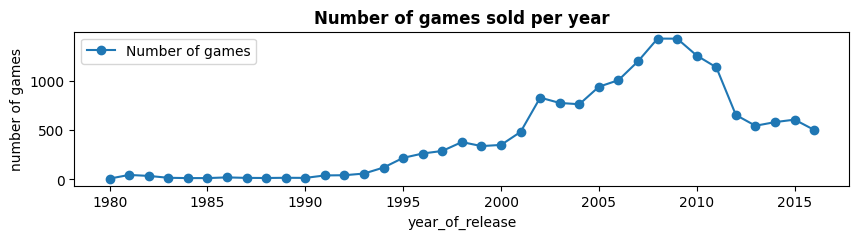

In [23]:
# Graficar cuantos juegos se publicaron por año
(df
 .pivot_table(index = 'year_of_release', values = 'name', aggfunc= 'count')
 .plot(style = 'o-', 
       y = 'name',
       ylabel = 'number of games', 
       label = 'Number of games',
       figsize = (10,2))
)
plt.title('Number of games sold per year',fontweight = 'bold');

A partir de 1995 se aprecia el crecimiento que comienza a tener la industria de 400 juegos por año y sigue generando crecimiento hasta 2008 con un pico 1500 juegos, desde ese momento, baja su generación y se concentra entre 500 y 600 juegos por año.

- Ahora es necesario saber que plataformas han vendido más hasta 2016, lo haremos con un top 10 de las plataformas con más ventas.

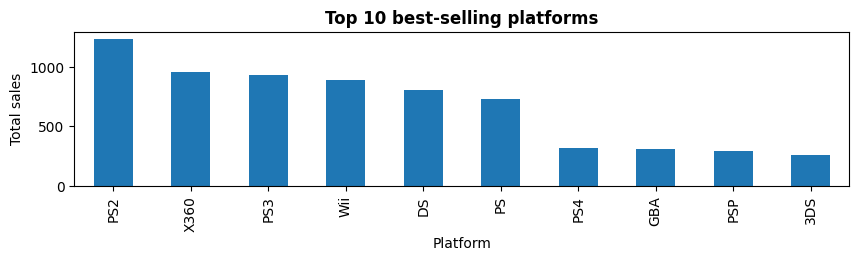

In [24]:
# Top 10 consolas con mayor ventas
df_platform =(df
 .pivot_table(index = 'platform' , 
              values = 'total_sales',
              aggfunc = 'sum')
 .sort_values('total_sales', ascending = False)
).head(10)
(df_platform
 .plot(
     kind = 'bar',
     xlabel = 'Platform',
     ylabel = 'Total sales',
     legend = False,
     figsize = (10,2)
 )
)
plt.title('Top 10 best-selling platforms',fontweight = 'bold');

- Teniendo el top 10 listo, veamos si el comportamiento de ventas por año tiene una tendencia similar en las plataformas seleccionadas.

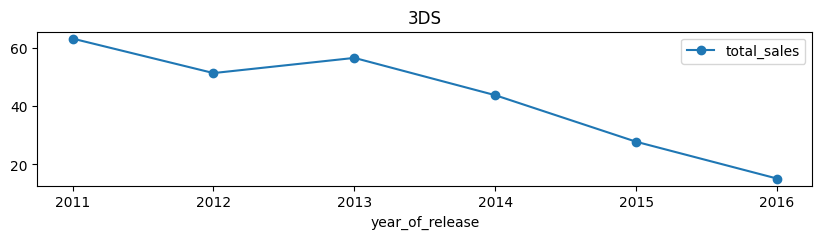

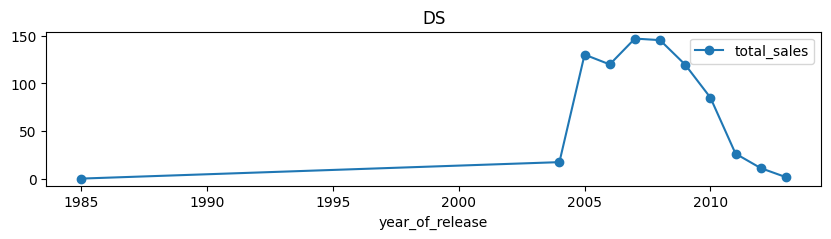

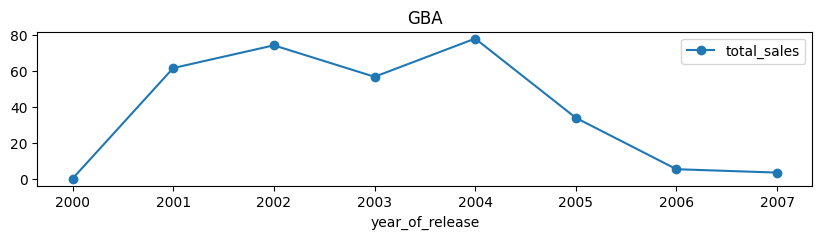

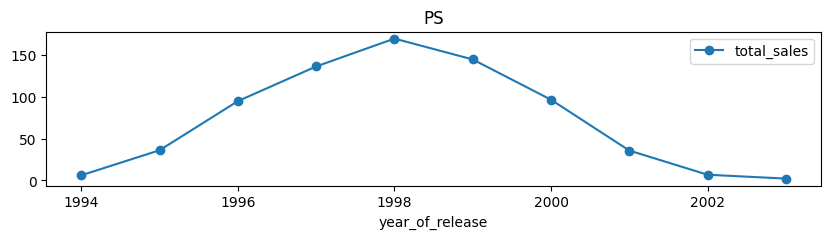

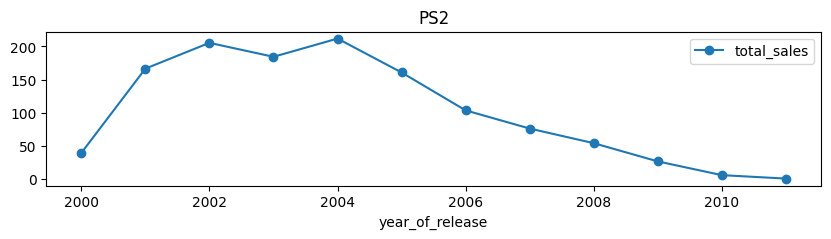

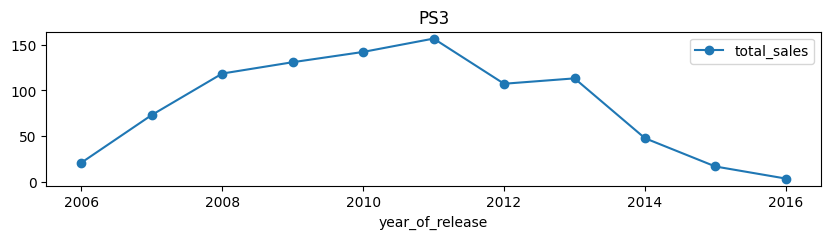

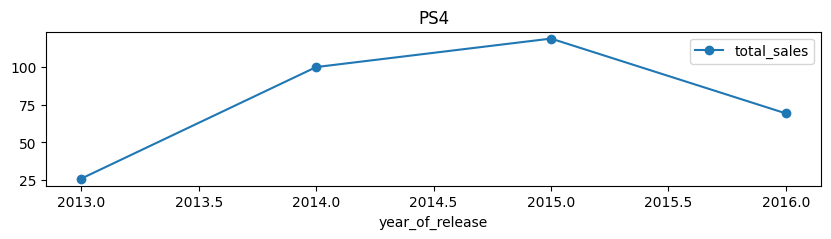

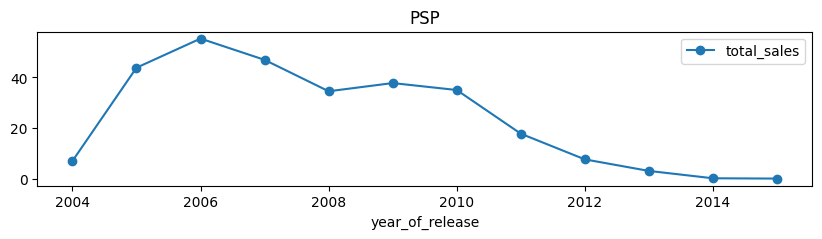

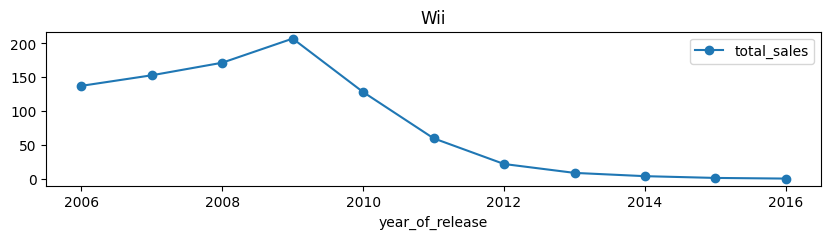

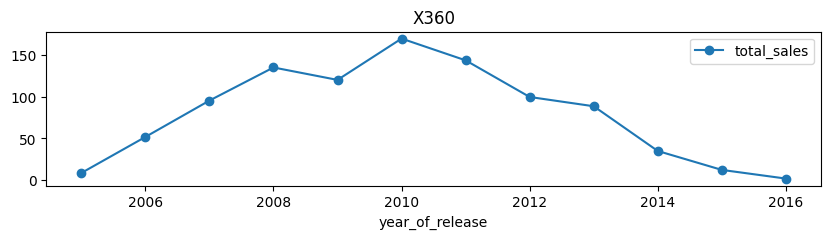

In [25]:
 # datasets filtrado con el top 10 de plataformas con mayor venta.
df_platform = (df
 .query('platform == @df_platform.index.tolist()')
.pivot_table( index = ['platform', 'year_of_release'] , values = 'total_sales', aggfunc = 'sum')
.reset_index()
)

#Distribución de copias vendidas con el top 10 de plataformas con mayor venta por año.
for values,group_data in df_platform.groupby('platform'):
    group_data.plot(
        kind = 'line',
        y = 'total_sales',
        x = 'year_of_release',
        title = values, 
        figsize = (10,2),
        style = 'o-',
    )

En la gráfica de la plataforma 'DS' se visualiza como hay una publicación en el año 1985, cuando en esa fecha dicha consola aun no estaba en el mercado.

In [26]:
df.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,company
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02,nintendo


La verdadera fecha de publicación del juego según google es 2007 y se desconoce porque en las paginas de critica tiene 1985 publicado. Con esta información, reemplazaremos el valor a 2007.

In [27]:
df.loc[15704,'year_of_release'] = 2007

Ya con el dato arreglado visualizamos nuevamente las gráficas.

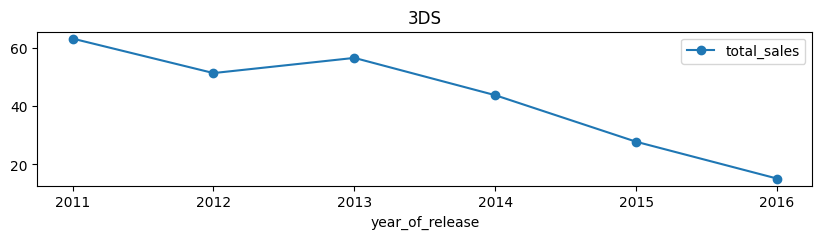

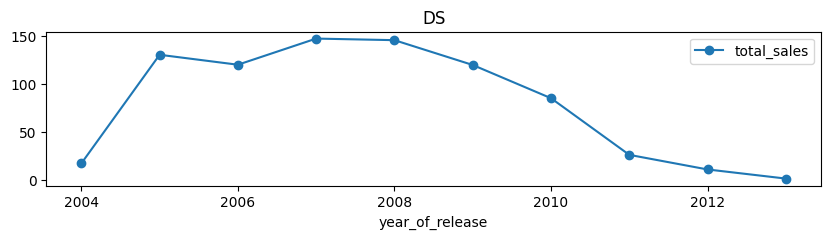

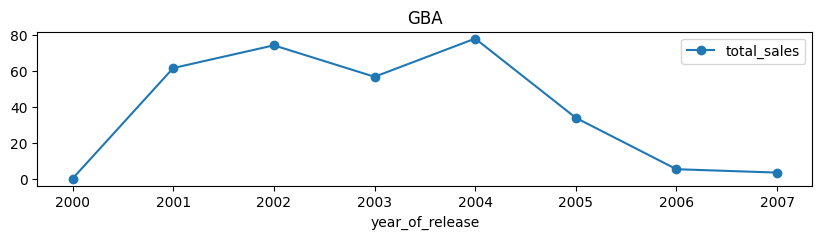

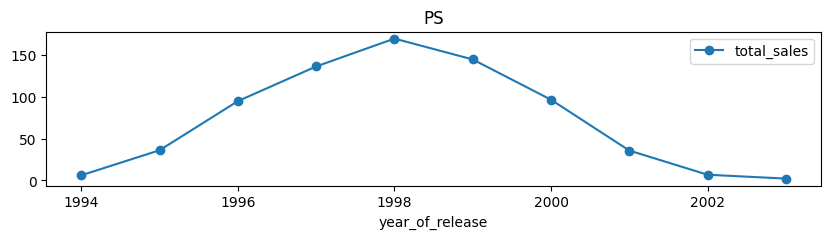

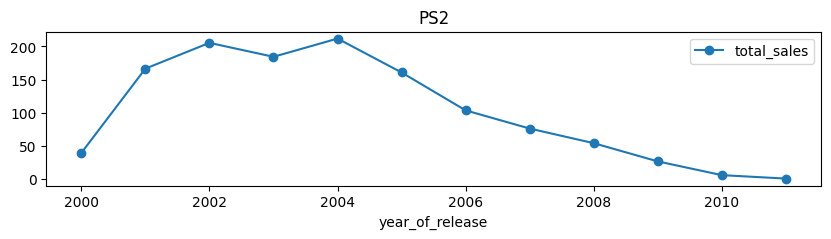

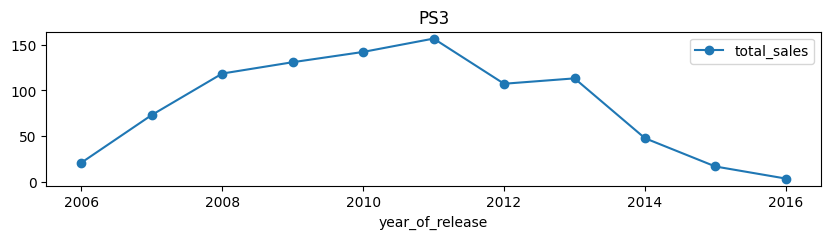

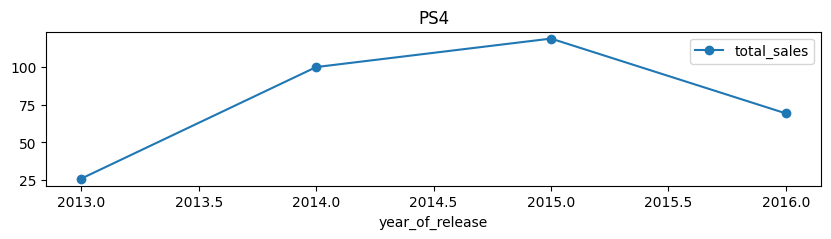

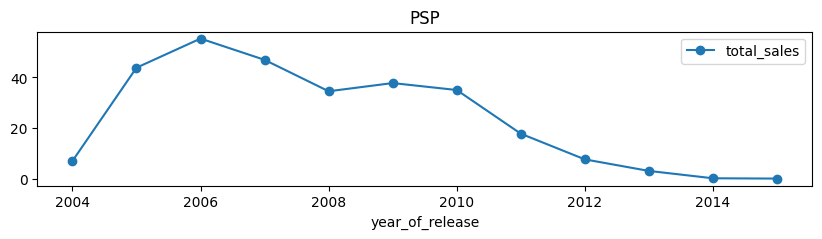

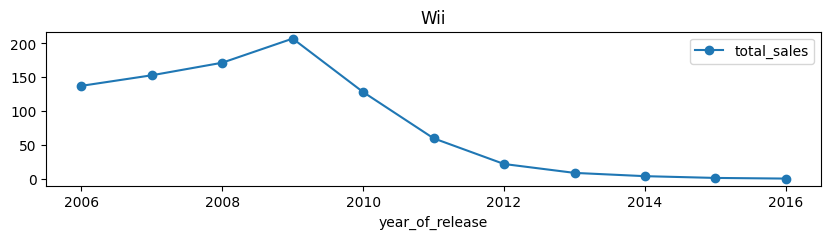

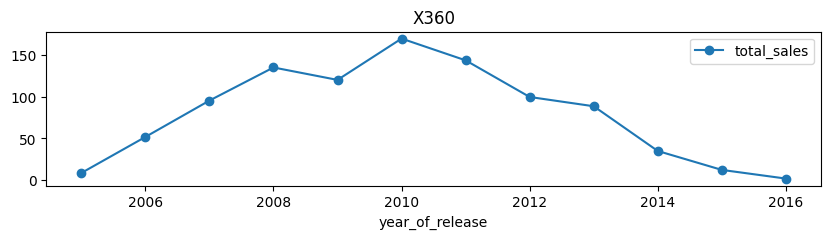

In [28]:
# Top 10 consolas con mayor ventas
df_platform =(df
 .pivot_table(index = 'platform' , 
              values = 'total_sales',
              aggfunc = 'sum')
 .sort_values('total_sales', ascending = False)
).head(10)

 # datasets filtrado con el top 10 de plataformas con mayor venta.
df_platform = (df
 .query('platform == @df_platform.index.tolist()')
.pivot_table( index = ['platform', 'year_of_release'] , values = 'total_sales', aggfunc = 'sum')
.reset_index()
)

#Distribución por copias vendidas de consola/año
for values,group_data in df_platform.groupby('platform'):
    group_data.plot(
        kind = 'line',
        y = 'total_sales',
        x = 'year_of_release',
        title = values, 
        figsize = (10,2),
        style = 'o-'
    )

Las gráficas nos aportan visualmente, que la vida de las plataformas es aproximadamente de diez años y en sus cinco primeros años tienen a generar su umbral superior de ventas y los próximos años se produce la decadencia, hasta su retiro del mercado.

In [29]:
# df con  las ventas totales y la duración en el mercado por plataforma
platform_duration= df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min','max']) # Hacer la agrupación por plataforma y años
platform_duration.columns = ('min_year', 'max_year') # Corregir las columnas
platform_duration['year_of_duration'] = platform_duration['max_year'] - platform_duration['min_year'] # generar la columna años de duración
platform_sales = df.pivot_table( index = 'platform' , values = 'total_sales', aggfunc = 'sum') # Hacer la agrupación por plataforma y ventas totales
platform_duration = platform_duration.merge(platform_sales, on = 'platform') # Unificar los 2 df generados
platform_duration = platform_duration.sort_values(['min_year','max_year'])
platform_duration

,min_year,max_year,year_of_duration,total_sales
platform,,,,
2600,1980,1989,9,86.48
NES,1983,1994,11,251.05
PC,1985,2016,31,255.76
GB,1988,2001,13,254.43
GEN,1990,1994,4,28.35
SNES,1990,1999,9,200.04
GG,1992,1992,0,0.04
SCD,1993,1994,1,1.86
NG,1993,1996,3,1.44


Generar un valor por la duración media de las plataformas no exitosas y exitosas, nos puede dar un valor engañoso y una tendencia fuera del foco buscado. Con el df platform_duration, se filtrara con las plataformas con más de 100 millones de ventas y ahí si generar la duración media de una plataforma exitosa. 

In [30]:
# Plataformas exitosas que ya no tienen ventas
platform_duration.query('total_sales >= 100 and max_year < 2016')

,min_year,max_year,year_of_duration,total_sales
platform,,,,
NES,1983,1994,11,251.05
GB,1988,2001,13,254.43
SNES,1990,1999,9,200.04
PS,1994,2003,9,727.58
N64,1996,2002,6,218.01
GBA,2000,2007,7,312.88
XB,2000,2008,8,251.57
PS2,2000,2011,11,1233.56
GC,2001,2007,6,196.73


In [31]:
#Duración en el mercado de las plataformas exitosas
platform_duration_median = platform_duration.query(
    'total_sales >= 100 and max_year < 2016')['year_of_duration'].median()
print('Considerando plataforma exitosa como aquella que vende más de 100 millones.')
print()
print(f'La duración de las plataformas es de aproximadamente {platform_duration_median} años.')

Considerando plataforma exitosa como aquella que vende más de 100 millones.

La duración de las plataformas es de aproximadamente 9.0 años.


Ahora, cuanto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer. Las nuevas plataformas, sin mirar compañía, aparecen en el mercado casi que anual y para saber cuanto tarda una compañía en sacar al mercado una nueva plataforma, es necesario agruparlas por compañía.

In [32]:
# Agregamos al df platform_duration la compañía de la plataforma
df_company = df[['platform', 'company']].drop_duplicates().reset_index(drop = True)
platform_duration = platform_duration.merge(df_company, on = 'platform', how = 'left')
platform_duration

,platform,min_year,max_year,year_of_duration,total_sales,company
0,2600,1980,1989,9,86.48,others
1,NES,1983,1994,11,251.05,nintendo
2,PC,1985,2016,31,255.76,unknown
3,GB,1988,2001,13,254.43,nintendo
4,GEN,1990,1994,4,28.35,sega
5,SNES,1990,1999,9,200.04,nintendo
6,GG,1992,1992,0,0.04,sega
7,SCD,1993,1994,1,1.86,sega
8,NG,1993,1996,3,1.44,unknown
9,3DO,1994,1995,1,0.10,others


In [33]:
#Generar un df por compañía
nintendo = platform_duration.copy()
playstation = platform_duration.copy()
microsoft = platform_duration.copy()
others= platform_duration.copy()

#Duración media para publicar una nueva plataforma en nintendo
nintendo = nintendo.query('company == "nintendo"')
nintendo['output_difference'] = nintendo['min_year'].diff().fillna(0)

print('Nintendo tarda en publicar una nueva plataforma en aproximadamente',(nintendo['output_difference'].mean()).round(1),'años.')
print('Y las plataformas ya existentes tardan aproximadamente',nintendo['year_of_duration'].median()/2,'años en desaparecer.')
print()

#Duración media para publicar una nueva plataforma en playstation
playstation = playstation.query('company == "playstation"')
playstation['output_difference'] = playstation['min_year'].diff().fillna(0)
print('Playstation tarda en publicar una nueva plataforma en aproximadamente',(playstation['output_difference'].mean()).round(1),'años.')
print('Y las plataformas ya existentes tardan aproximadamente',playstation['year_of_duration'].median()/2,'años en desaparecer.')
print()

#Duración media para publicar una nueva plataforma en microsoft
microsoft = microsoft.query('company == "microsoft"')
microsoft['output_difference'] = microsoft['min_year'].diff().fillna(0)
print('Microsoft tarda en publicar una nueva plataforma en aproximadamente',(microsoft['output_difference'].mean()).round(1),'años.')
print('Y las plataformas ya existentes tardan aproximadamente',microsoft['year_of_duration'].median()/2,'años en desaparecer.')
print()

#Duración media para publicar una nueva plataforma en el resto de compañías del mercado
others = others.query('company == "others"')
others['output_difference'] = others['min_year'].diff().fillna(0)
print('El resto de las compañias tardan en publicar una nueva plataforma en aproximadamente',(others['output_difference'].mean()).round(1),'años.')
print('Y las plataformas ya existentes tardan aproximadamente',others['year_of_duration'].median()/2,'años en desaparecer.')

Nintendo tarda en publicar una nueva plataforma en aproximadamente 2.9 años.
Y las plataformas ya existentes tardan aproximadamente 4.0 años en desaparecer.

Playstation tarda en publicar una nueva plataforma en aproximadamente 3.2 años.
Y las plataformas ya existentes tardan aproximadamente 4.75 años en desaparecer.

Microsoft tarda en publicar una nueva plataforma en aproximadamente 4.3 años.
Y las plataformas ya existentes tardan aproximadamente 4.0 años en desaparecer.

El resto de las compañias tardan en publicar una nueva plataforma en aproximadamente 3.8 años.
Y las plataformas ya existentes tardan aproximadamente 0.5 años en desaparecer.


Para saber a ciencia cierta que hace exitoso a un videojuego, es necesario analizar un periodo donde fueron exitosos y su evolución con los años, certificar que sea una tendencia y no por algún juego de moda. Para tomar un periodo donde se aprecie un punto alto de los videojuegos, se selecciona un lapso de seis años, siendo desde el 2011 hasta el 2016.

In [34]:
df_filter = df.copy()
df_filter = df_filter.query('year_of_release >= 2011')

Ya con el periodo seleccionado, ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? veremos que plataformas se posicionan potencialmente rentables.

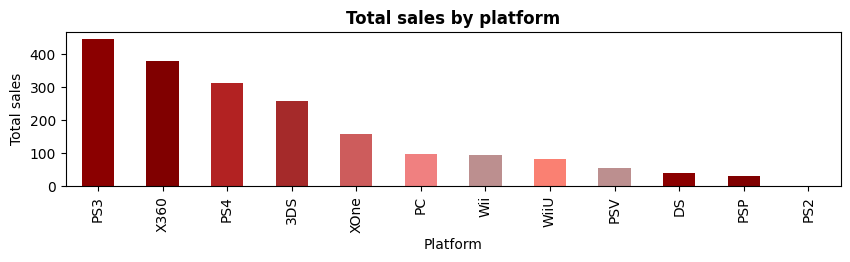

In [35]:
# Ventas por plataforma
(df_filter
 .pivot_table(index = 'platform', 
              values = 'total_sales', 
              aggfunc = 'sum')
 .sort_values('total_sales', ascending = False)
 .plot(kind = 'bar',
       use_index = True,
       y = 'total_sales',
       ylabel = 'Total sales',
       xlabel = 'Platform',
       legend = False,
       figsize = (10,2),
       color = ['darkred', 'maroon', 'firebrick', 'brown', 'indianred', 
                'lightcoral', 'rosybrown','salmon', 'rosybrown']
      )
)
plt.title('Total sales by platform', fontweight = 'bold');

Dos de las tres consolas más vendidas en los últimos seis años son de PlayStation, de primer lugar está la PS3 y en tercer lugar la PS4. Por otro lado, en segundo lugar se encuentra Microsoft con la plataforma X360.

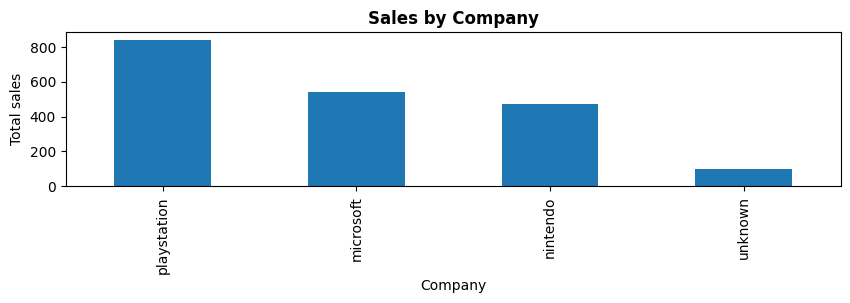

In [36]:
# Ventas por compañía
(df_filter
 .pivot_table(
     index = 'company',
     values = 'total_sales',
     aggfunc = 'sum')
 .sort_values('total_sales', ascending= False)
 .plot(
     kind = 'bar',
     figsize = (10,2),
     ylabel = 'Total sales',
     xlabel = 'Company',
     legend = False,
     color = 'tab:blue'
     )
 )
plt.title('Sales by Company', fontweight = 'bold');

Las compañías con mayores ventas, son importantes para la campaña a planificar. El grafico reafirma, que la compañia que tiene mayores ventas es playstation.

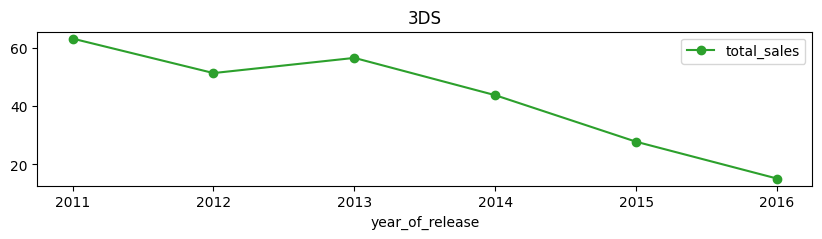

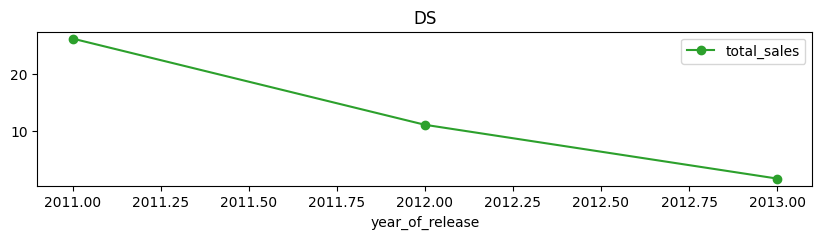

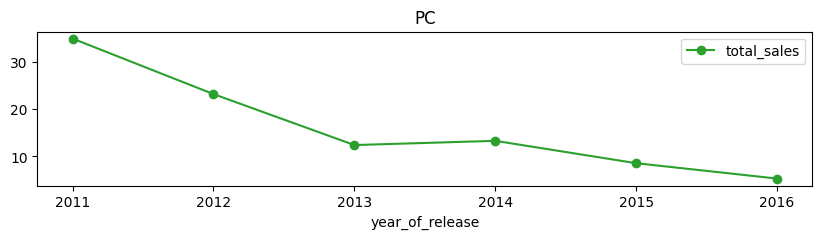

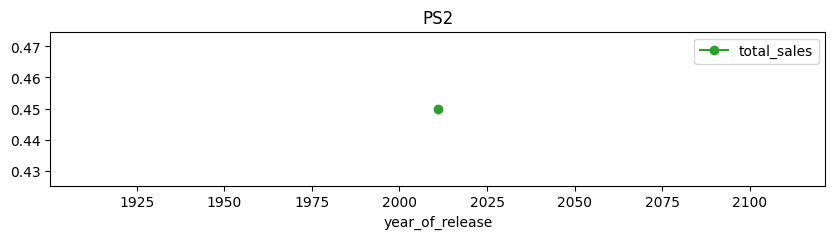

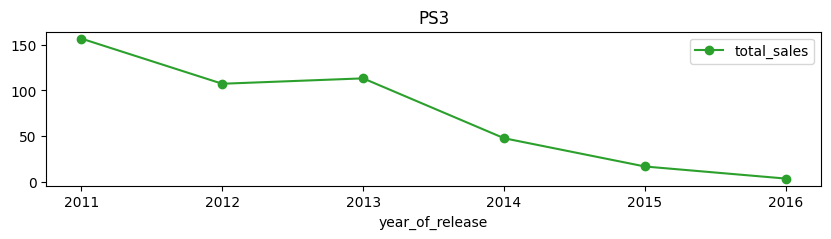

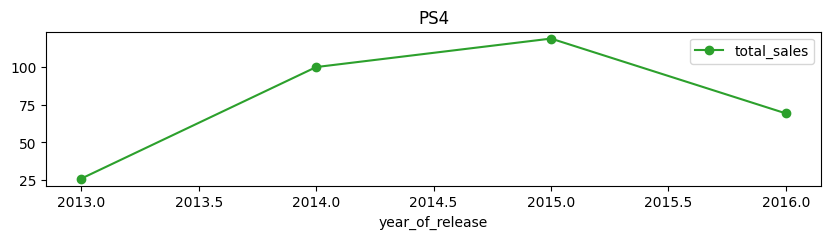

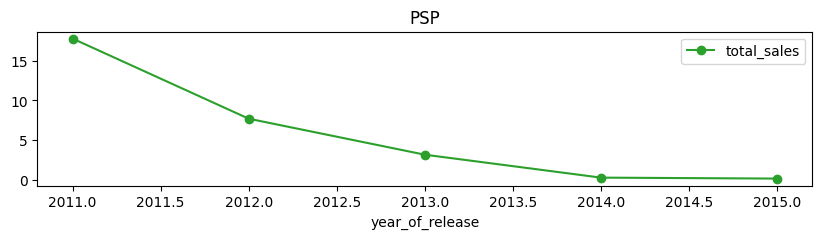

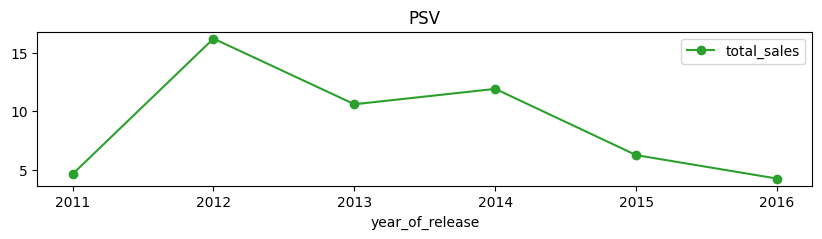

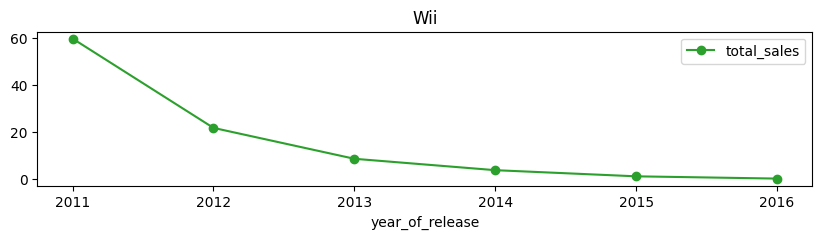

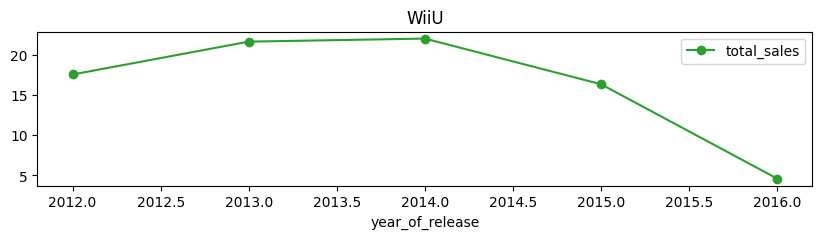

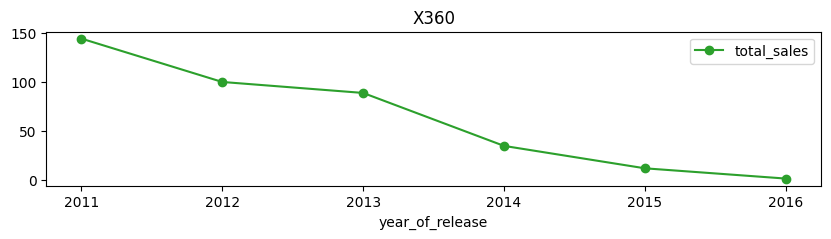

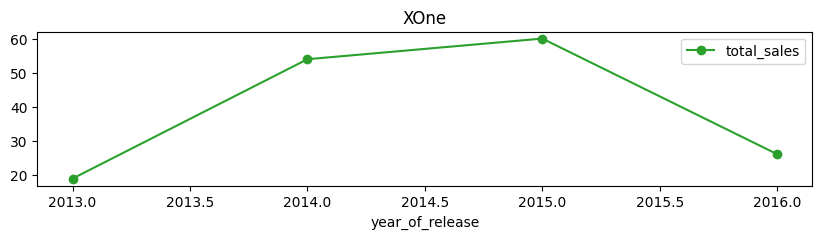

In [37]:
# Ventas por año y plataforma
df_filter_pt = (df_filter
               .pivot_table( index = ['platform', 'year_of_release'] , values = 'total_sales', aggfunc = 'sum')
               .reset_index()
               )
#Distribución por copias vendidas de consola/año
for values,group_data in df_filter_pt.groupby('platform'):
    group_data.plot(
        kind = 'line',
        y = 'total_sales',
        x = 'year_of_release',
        title = values, 
        figsize = (10,2),
        style = 'o-',
        color = 'tab:green'
    )

- Las plataformas que se reducen o ya no están en el mercado son:
    - 3DS
    - DS
    - PC
    - PS2
    - PS3
    - PSP
    - PSV
    - Wii
    - WiiU
    - X360
- Las plataformas que se mantienen en el mercado son:
    - PS4
    - XOne
    
Ya disgregando las plataformas que no se mantienen en el mercado, compararemos las que sí.

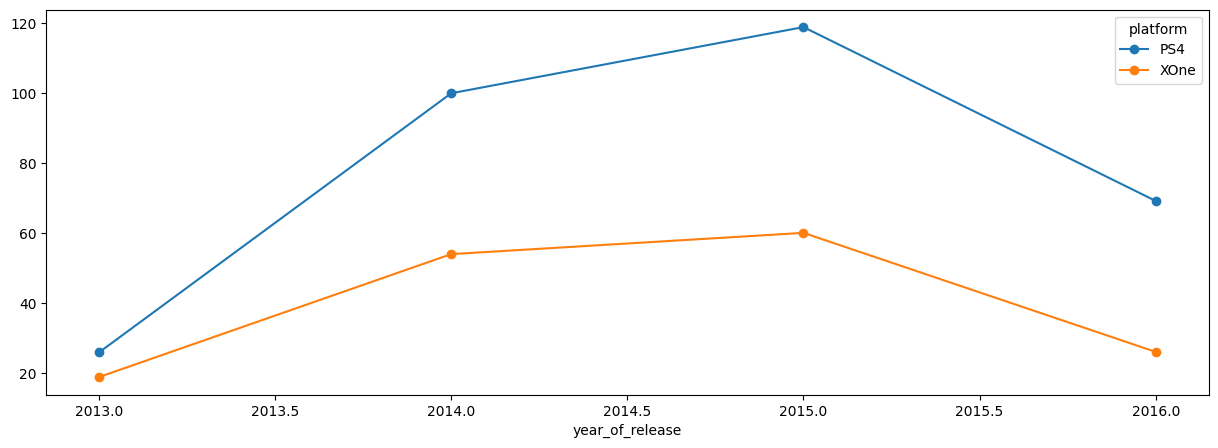

In [38]:
# Ventas por año y plataforma
(df_filter
 .pivot_table( index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .reset_index()
 .plot(
     y =  ['PS4','XOne'],
     x = 'year_of_release',
     figsize = (15,5),
     style = 'o-'));

Las plataformas tuvieron sus dos primeros años iniciales muy similares, pero en el tercer año se desprende mucho más PS4 y mantiene como la plataforma más relevantes en frente de XOne.

Por otro lado, es necesario detectar lo siguiente:
- ¿Son significativas las diferencias en las ventas? 
- ¿Qué sucede con las ventas promedio en varias plataformas?

Para saberlo, hay que filtrar los valores atípicos para cada plataforma y luego visualizar su comportamiento.

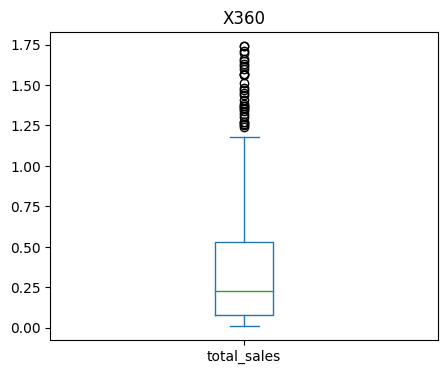

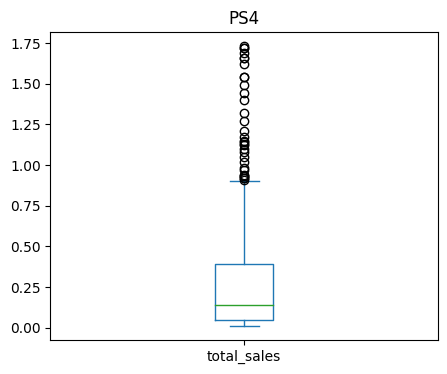

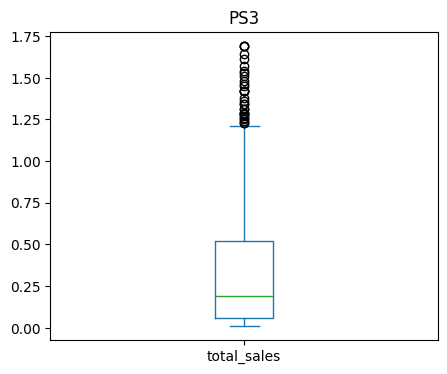

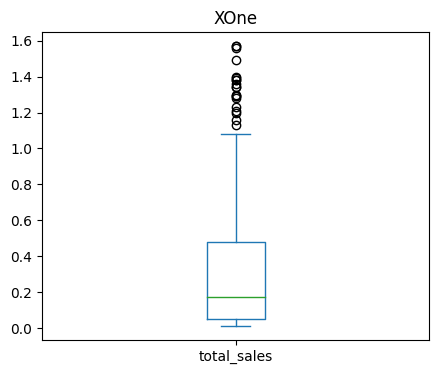

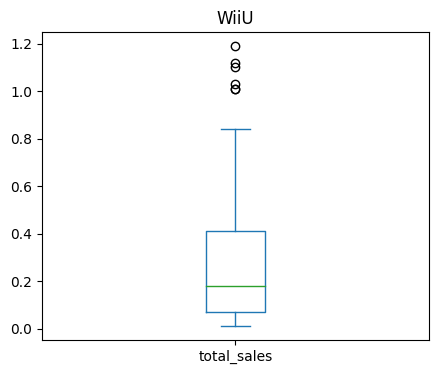

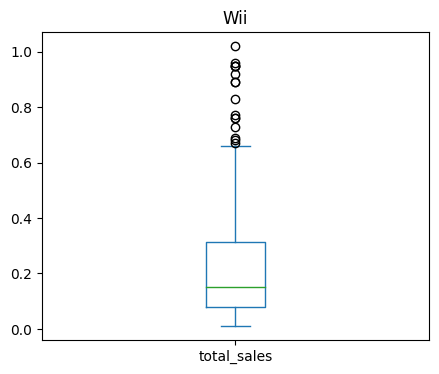

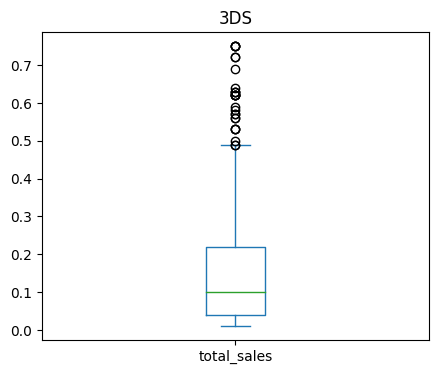

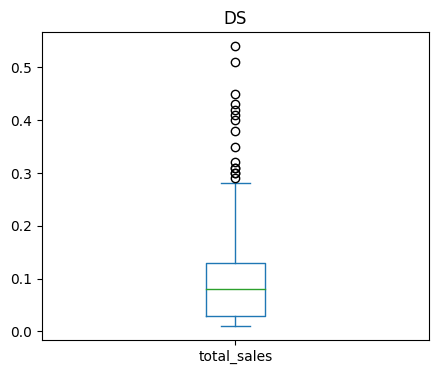

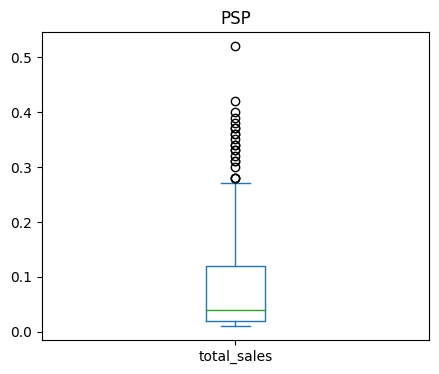

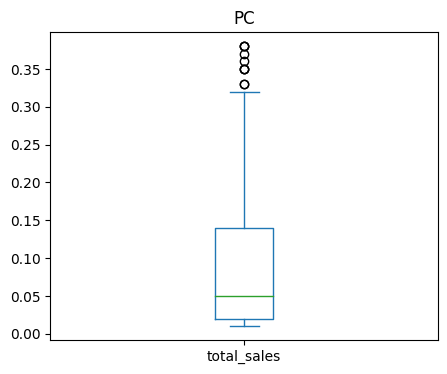

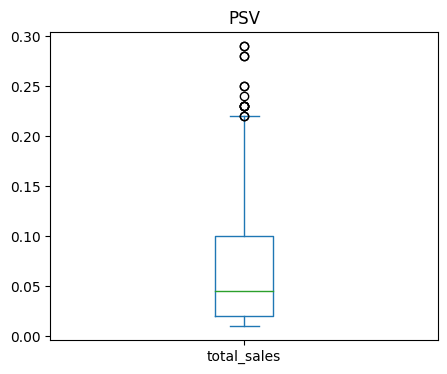

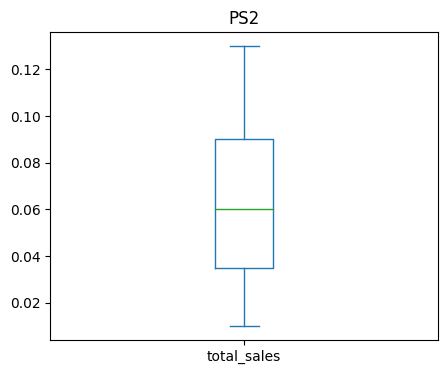

In [39]:
# Calcular el limite superior de las ventas por plataforma
upper_limit = []

for platform in df_filter['platform'].unique():
    
    Q1 = df[df['platform'] == platform]['total_sales'].quantile(0.25)
    Q3 = df[df['platform'] == platform]['total_sales'].quantile(0.75)
    IQR = Q3 - Q1 
    inferior_limit = Q1 - 1.5 * IQR
    upper_limit.append([platform, Q3 + 1.5 * IQR])
    
# Convertir en diccionario los limites obtenidos
thresholds = dict(upper_limit)

# Función para agregar los limites al df
def limit(row):
    platform = row['platform']
    if platform in thresholds:
        limits = thresholds[platform]
        return limits
df_filter['upper_limit'] = df_filter.apply(limit, axis = 1)

df_filter = df_filter.query('total_sales <= upper_limit')

# Función para filtrar el df con los limites superiores y graficar
for platform in df_filter['platform'].unique():
    df_filtered = df_filter.loc[df_filter['platform'] == platform]
    df_filtered.plot(
        kind='box', 
        y='total_sales',
        figsize = (5,4),
        title=platform)

Las ventas promedios por plataforma tienen un comportamiento similar. Sin embargo, las ventas se hacen significativas por los juegos que superar los limites generados por la media.

- **¿cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular?**

La plataforma selecciona es PS4, por las ventas que genera su compañía, por la tendencia que tiene hasta el 2016 y considerando que es una plataforma con solo tres años en el mercado, y como se aprecio en los datos ya visualizados, una plataforma tiene hasta los cinco años para mejorar sus ventas anuales.

In [40]:
# Filtrar el df con PS4
df_ps4 = df_filter.query('platform == "PS4"')
print(f' El dataset filtrado nos deja con, {df_ps4.shape[0]} juegos diferentes vendidos en la plataforma PS4 de playstation.')

 El dataset filtrado nos deja con, 338 juegos diferentes vendidos en la plataforma PS4 de playstation.


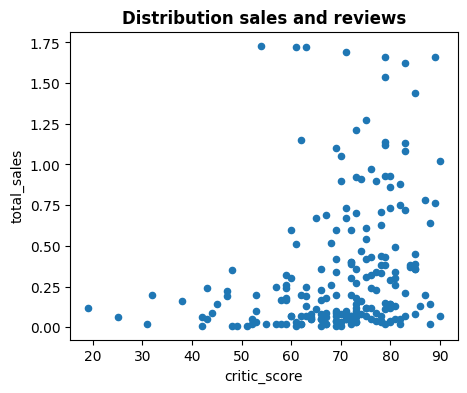

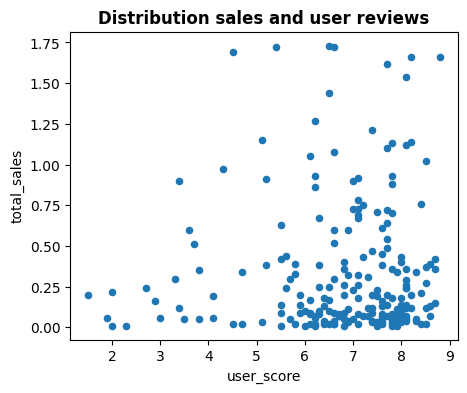

In [41]:
# Distribución ventas totales y criticas
df_ps4.plot(
    kind = 'scatter', 
    x = 'critic_score', 
    y = 'total_sales',
    figsize = (5,4)
    )
plt.title('Distribution sales and reviews', fontweight = 'bold')

# Distribución ventas totales y criticas de los usuarios
df_ps4.plot(
    kind = 'scatter', 
    x = 'user_score',
    y = 'total_sales',
    figsize = (5,4)
    )
plt.title('Distribution sales and user reviews', fontweight = 'bold');

Parece que las criticas de las empresas si tienen cierto efecto en las ventas de los videojuegos, y las critica de los usuarios tambien pero en menor proporción.

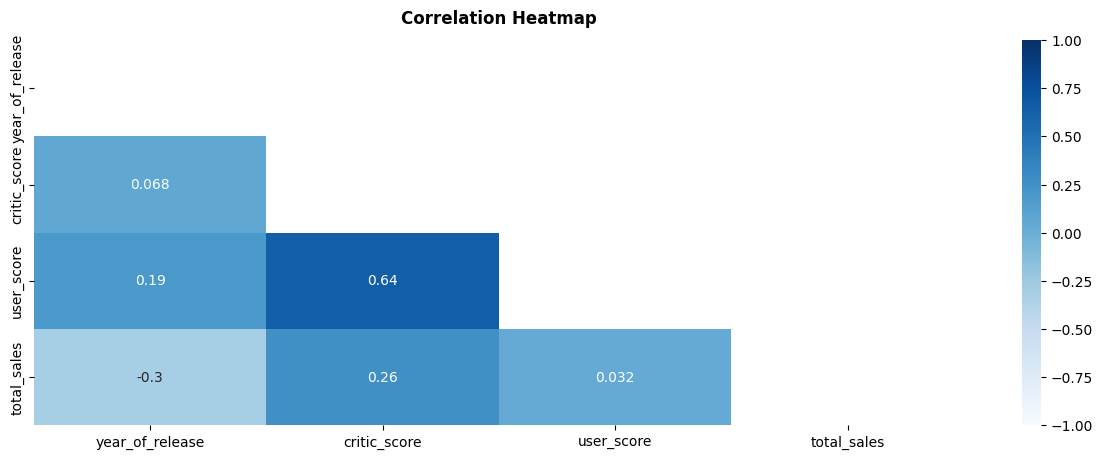

In [42]:
plt.figure(figsize = (15,5));
mask = np.triu(np.ones_like(df_ps4[['year_of_release','critic_score','user_score','total_sales']].corr()))
heatmap = (sns
           .heatmap(df_ps4[['year_of_release','critic_score','user_score','total_sales']]
                    .corr(), 
                    cmap = 'Blues', 
                    vmin = -1,
                    vmax = 1,
                    annot = True, 
                    mask = mask,
                   )
          )
(heatmap
 .set_title('Correlation Heatmap', 
            fontdict={'fontsize':12}, 
            pad=12,
            fontweight = 'bold'
           )
)
plt.show()

Con el mapa de calor, se corrobora que la correlación entre las críticas de puntuación y las ventas totales son la correlación más positiva o las variables que más influencia positiva tienen entre sí.

- ¿Qué género es más rentable?
¿Se pueden generalizar los géneros con ventas altas y bajas?

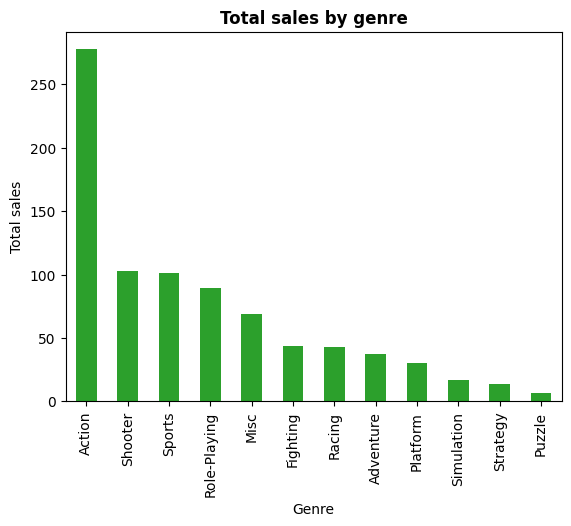

In [43]:
#Grafico para las ventas totales por genero
(df_filter
 .pivot_table(
     index = 'genre',
     values = 'total_sales',
     aggfunc = 'sum')
 .sort_values('total_sales', ascending = False)
 .plot(kind = 'bar',
       ylabel = 'Total sales',
       xlabel = 'Genre',
       legend = False,
       color = 'tab:green'
      )
)
plt.title('Total sales by genre', fontweight='bold');

- Los tres géneros más rentables en los ultimos cinco años son: acción, disparos y deportes. Sin embargo, es muy resaltante la gran diferencia que tiene el genero de acción en ventas totales.
- Los géneros si se pueden categorizar en ventas altas o bajas, porque géneros como simulación, estrategia y rompecabezas producen muy pocas ventas, comparados con los tres géneros mas rentables.

**Crear un perfil de usuario para cada región (NA, UE, JP) y determinar:**

1. Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
2. Los cinco géneros principales. Explica la diferencia.
3. Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [44]:
# Crear un df por cada región
na_sales = (df_filter
            .pivot_table(
                index = 'platform',
                values = 'na_sales',
                aggfunc = 'sum')
            .sort_values('na_sales',ascending = False)
           )
eu_sales = (df_filter
            .pivot_table(
                index = 'platform',
                values = 'eu_sales',
                aggfunc = 'sum')
            .sort_values('eu_sales',ascending = False)
           )
jp_sales = (df_filter
            .pivot_table(
                index = 'platform',
                values = 'jp_sales',
                aggfunc = 'sum')
            .sort_values('jp_sales',ascending = False)
           )
# Unir los datos de cada región en un df
sales_regions = na_sales.merge(eu_sales, on = 'platform')
sales_regions = sales_regions.merge(jp_sales, on = 'platform')
sales_regions

,na_sales,eu_sales,jp_sales
platform,,,
X360,102.90,53.97,2.06
PS3,85.30,71.47,38.57
XOne,44.09,24.55,0.14
PS4,34.97,43.29,10.08
3DS,23.44,14.57,31.30
Wii,21.24,11.32,6.45
WiiU,17.64,12.47,4.26
DS,9.52,4.27,3.46
PC,7.89,19.11,0.00


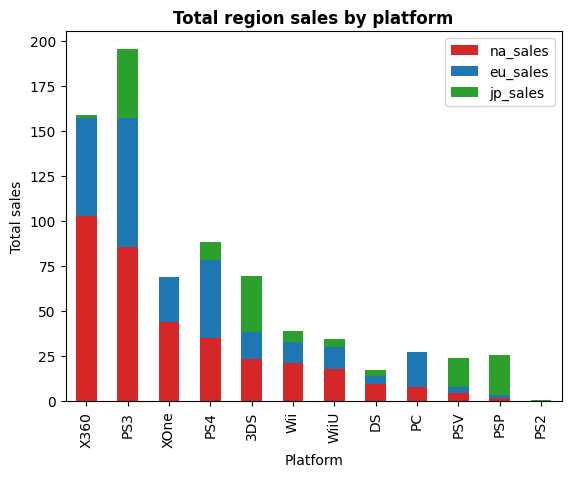

In [45]:
# Comparar las ventas de cada plataforma por región
a = sales_regions.plot(
    kind = 'bar',
    use_index = True,
    stacked = True,
    xlabel = 'Platform',
    ylabel = 'Total sales',
    color = ['tab:red','tab:blue','tab:green']);
a.set_title('Total region sales by platform', weight='bold');

- En norteamerica domina X360, pero PS3 le sigue los pasos.
- En europa sucede al contrario, PS3 domina y X360 sigue sus pasos.
- En japon domina PS3 y a diferencia de las otras dos regiones, las plataformas que le siguen son portatiles (3DS, PSP y PSV), japon indica que las plataformas portatiles tienen una gran influencia en el mercado para su región. Un tema muy interesante para otro estudio.

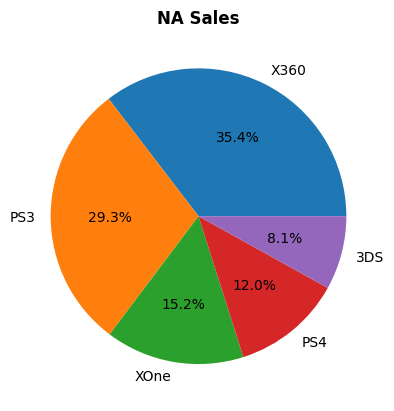

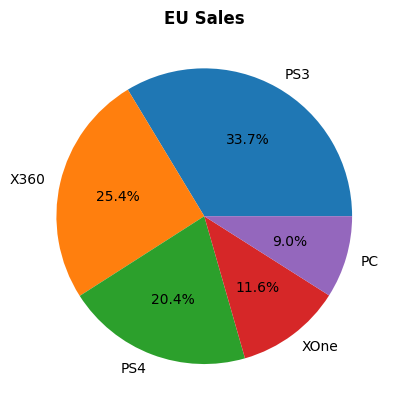

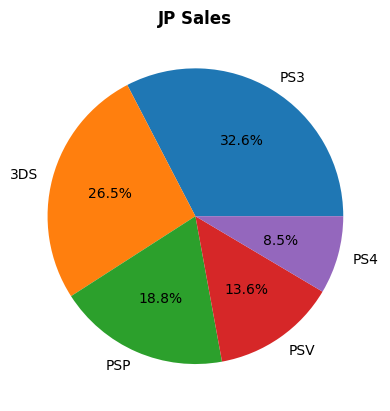

In [46]:
# Comparar las cinco plataformas más vendidas por región de otra manera
(na_sales
 .head()
 .plot(kind = 'pie', 
       subplots = True,
       legend = False, 
       ylabel = '',
       autopct='%1.1f%%')
)
plt.title('NA Sales', fontweight='bold')
(eu_sales
 .head()
 .plot(kind = 'pie', 
       subplots = True, 
       legend = False,
       ylabel = '',
       autopct='%1.1f%%')
)
plt.title('EU Sales', fontweight='bold')
(jp_sales
 .head()
 .plot(kind = 'pie', 
       subplots = True, 
       legend = False, 
       ylabel = '',
       autopct='%1.1f%%')
)
plt.title('JP Sales', fontweight='bold')
plt.show;

Es importante resaltar que PS4 se mantiene en las tres regiones, no en primera posición, pero recordemos que solo tiene tres años en el mercado y su porcentaje estima ir en alza si tiene un comportamiento normal para el 2017.

In [47]:
# Los cinco géneros mejor vendidos por región
na_genre = (df_filter
            .pivot_table(
                index = 'genre',
                values = 'na_sales',
                aggfunc = 'sum')
            .sort_values('na_sales',ascending = False)
           )
eu_genre = (df_filter
            .pivot_table(
                index = 'genre',
                values = 'eu_sales',
                aggfunc = 'sum')
            .sort_values('eu_sales',ascending = False)
           )
jp_genre = (df_filter
            .pivot_table(
                index = 'genre',
                values = 'jp_sales',
                aggfunc = 'sum')
            .sort_values('jp_sales',ascending = False)
           )
genre_regions = na_genre.merge(eu_genre, on = 'genre')
genre_regions = genre_regions.merge(jp_genre, on = 'genre')
genre_regions

,na_sales,eu_sales,jp_sales
genre,,,
Action,117.41,88.64,43.93
Sports,51.24,29.70,9.03
Shooter,48.72,38.45,3.30
Misc,33.88,16.32,12.87
Role-Playing,29.62,18.91,33.58
Fighting,19.47,11.46,8.54
Racing,14.71,21.67,0.92
Platform,13.41,12.11,1.28
Adventure,11.66,11.21,11.40


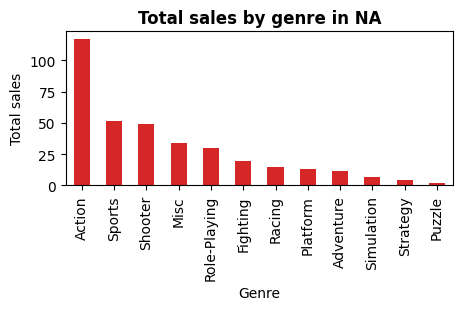

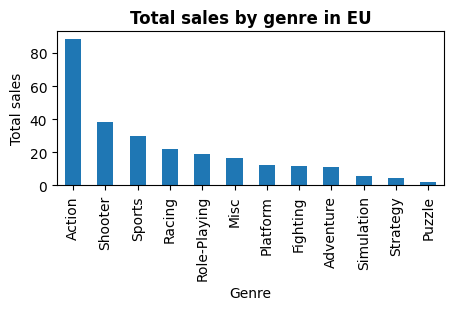

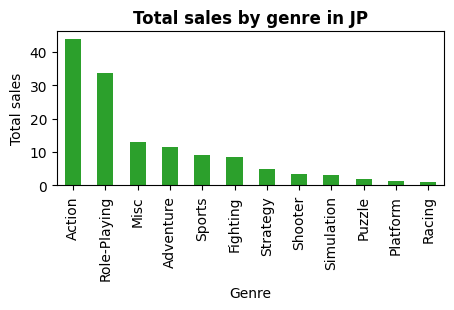

In [48]:
# Gráficas de los géneros por regiones
na_genre.plot(
    kind = 'bar',
    use_index = True,
    stacked = True,
    xlabel = 'Genre',
    ylabel = 'Total sales',
    figsize = (5,2),
    legend = False,
    color = 'tab:red'
    )
plt.title('Total sales by genre in NA', fontweight='bold')

eu_genre.plot(
    kind = 'bar',
    use_index = True,
    stacked = True,
    xlabel = 'Genre',
    ylabel = 'Total sales',
    figsize = (5,2),
    legend = False,
    color = 'tab:blue'
    )
plt.title('Total sales by genre in EU', fontweight='bold')

jp_genre.plot(
    kind = 'bar',
    use_index = True,
    stacked = True,
    xlabel = 'Genre',
    ylabel = 'Total sales',
    figsize = (5,2),
    legend = False,
    color = 'tab:green'
    )
plt.title('Total sales by genre in JP', fontweight='bold');

Antes de comparar el rating por región, es necesario tener claro que significan las letras
- EC (Para niños pequeños)
- E (Todos)
- E 10+ (10 años y mayores)
- T (Adolescentes)
- M (Para adultos)

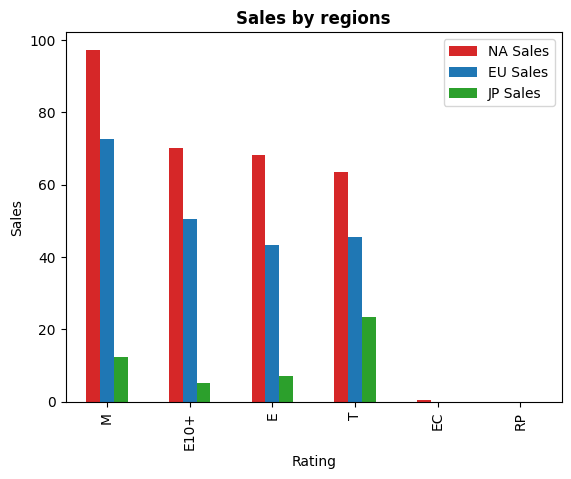

In [49]:
# Comparar el rating más vendido por región
df_rating = (df_filter
 .pivot_table(
     index = 'rating',
     values = ['na_sales','eu_sales', 'jp_sales'],
     aggfunc = 'sum')
 .sort_values('na_sales', ascending = False)
)
df_rating = df_rating[['na_sales','eu_sales', 'jp_sales']]

df_rating.plot(
    kind = 'bar',
    ylabel = 'Sales',
    xlabel = 'Rating',
    color = ['tab:red','tab:blue','tab:green']
)
plt.title('Sales by regions', fontweight = 'bold')
plt.legend(labels=['NA Sales','EU Sales', 'JP Sales']);

Todas las variables tienen diferencias por regiones, es un punto importante a considerar para las decisiones futuras.

## <a id='toc1_6_'></a>[Hipótesis:](#toc0_)

- **Hipotesis: ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son similares?**

    - **H_0** = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son similares. 
    - **H_1** =  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son similares.

In [50]:
df_xone = df_filter.query('platform == "XOne"')['user_score'].dropna()
df_pc = df_filter.query('platform == "PC"')['user_score'].dropna()

print(df_xone.median(),df_pc.median())
print(np.var(df_xone))
print(np.var(df_pc))

6.8 6.8
1.9137237622175935
2.5114058581520755


- **¿Las varianzas de las poblaciones son similares?**    
    - H_0 = Las varianzas son similares.
    - H_1 = Las varianzas no son similares.

In [51]:
alpha = 0.05
results = st.levene(df_xone, df_pc)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.05961808481492303
No rechazamos la hipótesis nula


In [52]:
alpha = 0.05
results = st.ttest_ind(df_xone, df_pc, equal_var = True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.42000747066431476
No rechazamos la hipótesis nula


- **Hipotesis: ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?**

    - **H_0** = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son similares. 
    - **H_1** = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes.

In [53]:
df_action = df_filter.query('genre == "Action"')['user_score'].dropna()
df_sports = df_filter.query('genre == "Sports"')['user_score'].dropna()

print(df_action.median(), df_sports.median())
print(np.var(df_action))
print(np.var(df_sports))

7.0 6.0
1.808440717578464
3.1012539293581844


- **¿Las varianzas de las poblaciones son similares?**    
    - H_0 = Las varianzas son similares.
    - H_1 = Las varianzas no son similares.

In [54]:
alpha = 0.05
results = st.levene(df_action, df_sports)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 5.500787742770127e-06
Rechazamos la hipótesis nula


In [55]:
alpha = 0.05
results = st.ttest_ind(df_action, df_sports, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.1883093513438487e-13
Rechazamos la hipótesis nula


## <a id='toc1_7_'></a>[Conclusiones](#toc0_)

1. **Visualizar los datos:** el conjunto de datos original tenía 16715 filas y 11 columnas, considenrando que tiene ausentes en seis columnas, estaba constituido  por 183865 valores. Sin embargo, 22318 valores estaban ausentes, lo que representa el 12.14% de los datos. Además, los encabezados estaban en mayúsculas y algunos tipos de datos eran incorrectos.

2. **Preprocesamiento y preparación de datos:** se corrigieron los tipos de datos en la columna `user_score`. Esto ha asegurado que todos los datos en la columna sean precisos y consistentes.

    Los valores ausentes en las columnas `critic_score`, `user_score` y `rating` no fueron reemplazados con la media o la mediana. Esto se debe a que estas columnas son personificadas por cada juego y rellenarlas con valores promedio o medianos sería inexacto. En cambio, los valores ausentes en las columnas `year_of_release`, `name` y `genre` fueron eliminados porque no representaban mas del 5% de sus valores.

    Estos cambios han mejorado  un poco la calidad de los datos y han hecho que el conjunto de datos sea más preciso, a pesar que el dataset aún tenga valores ausentes.

3. **Enriquecimiento de los datos:** para mejorar la información suministrada por el conjunto de datos, se agregaron dos columnas nuevas: `total_sales` y `company`. La columna `total_sales` está conformada por la sumatoria de las ventas de cada región y la columna `company` está constituida por las compañías que fabricaron cada plataforma.

4. **Análisis de los datos:** el enfoque para el análisis de datos fue centrado en los siguientes puntos:

    - **¿qué compañías venden más por videojuego?** la compañía con mayor ventas historicas es Playstation, superando los 3500 millones de dólares en ventas, le sigue Nintendo con una cifra de 3400 millones y de tercer lugar se encuentra Microsoft, pero con una separación muy pronunciada, debido a que sus ventas llegan a 1300 millones. Ahora bien, en los ultimos cinco años playstation se mantienen con 842 millones de ventas, pero al cambio viene en el segundo lugar, microsoft con 539 millones y Nintendo con 473 millones. Parece que algo esta cambiando en la industria. 

    - **¿qué plataforma genera más ventas en videojuegos?** PS2 vendió más de 152 millones de unidades en todo el mundo, lo que la convierte en la plataforma de videojuegos más vendida de todos los tiempos, y también es la plataforma con más ventas en sus videojuegos, con 1522 millones. Eso para las ventas históricas, pero para los últimos 5 años la plataforma con más ventas se la lleva playstation nuevamente con PS3, que logro vender 445 millones en videojuegos.

    - **¿qué género de videojuego es más solicitado en el mercado?** los cinco géneros más solicitados en el mercado de los videojuegos son:
        - Acción    
        - Disparos
        - Deportes
        - Rol
        - Miscelánea
     Estos géneros son populares porque ofrecen una variedad de experiencias diferentes que atraen a jugadores de todas las edades y niveles de habilidad. Los juegos de acción son emocionantes y llenos de adrenalina, mientras que los juegos de disparos son desafiantes y requieren precisión, los deportivos ofrecen una experiencia competitiva y social, mientras que los de rol, permiten a los jugadores crear sus propios personajes y vivir aventuras. Por otro lado, el genero miscelánea es una categoría amplia que incluye juegos de todos los géneros, desde juegos de puzzles hasta juegos de plataformas.

    - **¿qué influencia tienen las críticas en las ventas de los videojuegos?** tanto las críticas de las compañías y la de los usuarios reflejan un leve efecto en las ventas de los videojuegos. Presentan una tendencia mínima de correlación positiva. Esto quiere decir que, conocer la crítica de un videojuego forma parte de su éxito, pero en pequeña proporción. 

    - **¿La clasificación por edad afecta en las ventas de los videojuegos?** sí, se visualizo que las clasificación para adultos genera mayor venta. Se puede concluir que, estamos en una generación donde es cultural seguir jugando videojuegos de adulto.
    
    - **¿varían los resultados anteriores por regiones?** sí, todos los resultados anteriores tienen variaciones, para ello, fue necesario crear un perfil de usuario y conocer las tendencias de cada región. Para la creación del perfil por región, en cuanto a lo más vendido: primero indica la plataforma, segundo los 5 géneros y tercero la clasificación de edad.

**Perfiles de usuarios:**
- Perfil de usuario de Norteamérica: 
    - X360.
    - Acción, deportes, disparos, misc y juego de roles.
    - M (Para adultos).
- Perfil de usuario de Europa: 
    - PS3.
    - Acción, disparos, deportes, carreras y juego de roles.
    - M (Para adultos).
- Perfil de usuario de Japón:
    - PS3.
    - Acción, juego de roles, misc, aventuras y deportes.
    - T (Adolescentes).

5. **Hipótesis:**
Una hipótesis es una declaración que puede ser probada o falsa. Es una explicación posible de un fenómeno que puede ser verificada o refutada por la evidencia. Las hipótesis son importantes en la investigación científica porque proporcionan una dirección para la investigación y ayudan a los investigadores a desarrollar nuevas teorías.

En este estudio, se plantearon dos hipótesis:
- ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son similares?
- ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?


Los resultados de este estudio mostraron que la primera hipótesis, de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son similares, no fue rechazada. Esto significa que no hay evidencia suficiente para decir que las críticas de los usuarios difieren entre estas plataformas. La segunda hipótesis, de que las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes, fue rechazada. Esto significa que hay evidencia suficiente para decir que las críticas de los usuarios en estos géneros difieren.

Este resultado es importante porque sugiere que los usuarios tienen diferentes preferencias y expectativas para los videojuegos, en el género. Esto puede tener implicaciones importantes para la industria de los videojuegos, ya que sugiere que los desarrolladores deben adaptar sus juegos a las necesidades de diferentes usuarios.


6. **Conclusión Final:** los patrones para que un videojuego sea exitoso son:

- Desarrollar un juego para una plataforma popular. Las plataformas más populares son PlayStation, Nintendo y Microsoft. Sin embargo las que tienen mejor situación actual es Playstation y Microsoft.

- Elegir un género popular. Los géneros más populares son acción, disparos, deportes, juego de roles y miscelania.

- Obtener una clasificación de edad por ESRB que sea apropiada para su público objetivo. Las clasificaciones de edad más solicitadas son M (adultos), E10+ (10 años y mayores) y E (todos).

- Considerar los perfiles de usuario al desarrollar una campaña de marketing. Los perfiles de usuario varían según la región. Por ejemplo, los usuarios de Norteamérica prefieren la consola Xbox 360, mientras que los usuarios de Europa y Japón, compran más juegos para la PlayStation 3.

7. **Recomendaciones:** para facilitar los estudios en la compañía y optimizar el tiempo que toma en analizar los datos, se recomiendan las siguientes acciones:

- Disminuir los valores ausentes. Esto se puede hacer rellenando los valores ausentes con datos de otras fuentes.
- Enriquecer los datos. Agregando nuevas columnas de datos, como por ejemplo la cantidad de jugadores activos, las ventas mensuales generadas y que sean almacenadas en otra base da datos.

Aquí hay algunos detalles adicionales sobre cada recomendación:

- Disminuir los valores ausentes. Los valores ausentes pueden hacer que los datos sean inexactos y dificultan el análisis. Al rellenar los valores ausentes, la compañía puede mejorar la precisión de sus datos.
- Enriquecer los datos. Los datos enriquecidos proporcionan información más detallada sobre los videojuegos. Esto puede ayudar a la compañía a tomar mejores decisiones sobre a qué público objetivo apuntar y cómo comercializar sus juegos.

Siguiendo estas recomendaciones, la compañía puede mejorar su capacidad para estudiar y analizar los datos sobre los videojuegos. Esto le ayudará a tomar mejores decisiones de marketing y a aumentar las ventas de sus juegos.

In [56]:
#df.to_excel('df_video_games.xlsx')

In [57]:
#df_filter.to_excel('df_video_games_filter.xlsx')
#platform_duration.to_excel('df_platform_duration.xlsx')